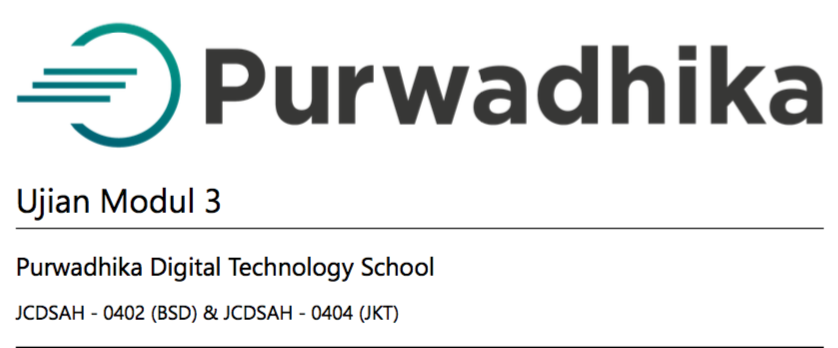

**Case Study** <br><br>
Di dalam bisnis perhotelan, memastikan ketersediaan kamar hotel di suatu waktu dan untuk beberapa waktu yang akan datang sangat penting dalam mengoptimalkan pendapatan. Informasi mengenai ketersediaan kamar yang akurat dan aktual dapat menghindarkan hotel dari berbagai kerugian, semisal kerugian yang disebabkan oleh tamu yang membatalkan pesanan atau tidak melakukan check in di waktu kedatangannya. <br><br>
Tamu yang membatalkan penginapannya, baik setelah mengabari pihak hotel terlebih dahulu (misalkan menghubungi sendiri atau dihubungi pihak hotel) maupun tidak, menyebabkan kekosongan kamar yang seharusnya mereka inapi. Kamar-kamar ini sebenarnya masih dapat disewakan kembali ke tamu yang lainnya, namun akan lebih sulit untuk memutuskan dengan segera kamar mana saja yang dapat disewakan kembali apabila kabar pembatalan oleh tamu diterima pihak hotel secara mendadak, semisal beberapa saat sebelum waktu check in.<br><br>
Diberikan sebuah dataset berisi informasi pemesanan kamar hotel, Anda diminta untuk membangun sebuah model untuk memprediksi apakah seorang pelanggan yang telah memesan sebuah kamar akan membatalkan pesanannya. Model Anda diharapkan dapat menjadi salah satu sarana untuk mengidentifikasi pembatalan pesanan dengan lebih dini sehingga dapat mengurangi risiko kerugian akibat pembatalan pesanan seperti yang dijelaskan di atas.


# **PROBLEM FRAMING**

**Business Objectives**

Dengan summary study case di atas, dapat kita garis bawahi "membuat/membangun sebuah model" adalah tujuan utama dari proyek ini. Model yang kita bangun ini nanti nya akan digunakan untuk memprediksi apakah seorang pelanggan yang telah memesan sebuah kamar akan membatalkan pesanannya. Hasil dari prediksi akan dipakai oleh pihak management untuk mengambil keputusan yang lebih cepat apabila pelanggan yang telah memesan sebuah kamar membatalkan pesanannya, sehingga management dapat mengantisipasi jumlah kamar yang kosong.


**Output and Utilization**

Sistem prediksi yang dapat menyimpulkan apakah pelanggan yang telah memesan akan membatalkan pesanannya. Prediksi ini berdasarkan dari fitur-fitur yang nantinya akan ditentukan berdasarkan tingkat korelasinya.


**Model Prediction**

Karena kesimpulan yang akan diambil bersifat kategorikal, maka kami akan gunakan model classifier

**Performance Measure**

asasd

**Risk of Failure in Prediction**

Hasil dari prediksi merupakan kemungkinan yang tingkat akurasinya akan diukur pada saat membangun model. Namun dari segi dampak yang dapat ditimbulkan dari kesalahan prediksi oleh model yang pertama adalah jumlah kamar kosong yang tidak terpesan / dibatalkan pesanannya akan meningkat yang mana akan menyebabkan turunnya pendapatan hotel tersebut. Kedua, tingkat kepuasan pelanggan akan menurun, dikarenakan keterlambatan management untuk memberi informasi mengenai ketersediaan kamar.

# **IMPORTING LIBRARY AND DATASET**

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import category_encoders as ce
import seaborn as sns

#Importing Dataset from sklearn
from sklearn.datasets import make_blobs, load_breast_cancer

#Linear Regression Library
from sklearn.linear_model import LinearRegression, LogisticRegression

#Decision Tree Library
from sklearn.tree import DecisionTreeClassifier, plot_tree, DecisionTreeRegressor

#KNN Library
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

#Model Selection Library
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

#Preprocessing Library
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler, StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, r2_score, accuracy_score, plot_roc_curve, plot_precision_recall_curve, f1_score, silhouette_score, confusion_matrix

#Hyperparameter Tuning Library
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, RandomForestRegressor, VotingClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

#Principal Component Analysis
from sklearn.decomposition import PCA

#Unsupervised Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage, average, complete
from scipy.spatial.distance import cdist, pdist 

import warnings
warnings.filterwarnings('ignore')

In [87]:
from google.colab import files
uploaded = files.upload()

Saving hotel_bookings.csv to hotel_bookings (1).csv


In [88]:
hotel = pd.read_csv('hotel_bookings.csv')
hotel.head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,NaN,NaN,0,Transient,107.0,0,0,Check-Out,2015-07-03
7,Resort Hotel,0,9,2015,July,27,1,0,2,2,0.0,0,FB,PRT,Direct,Direct,0,0,0,C,C,0,No Deposit,303.0,NaN,0,Transient,103.0,0,1,Check-Out,2015-07-03
8,Resort Hotel,1,85,2015,July,27,1,0,3,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,82.0,0,1,Canceled,2015-05-06
9,Resort Hotel,1,75,2015,July,27,1,0,3,2,0.0,0,HB,PRT,Offline TA/TO,TA/TO,0,0,0,D,D,0,No Deposit,15.0,NaN,0,Transient,105.5,0,0,Canceled,2015-04-22


In [89]:
# acquiring information of dataset numerical distribution

hotel.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [90]:
# acquiring information of datatypes of each columns

hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [91]:
# checking the NaN values of columns

hotel.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [92]:
# replacing NaN Values with 0

hotel.fillna(0, inplace=True)
hotel.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                         

# **EXPLORATORY DATA ANALYSIS**

In [93]:
num_features = ["lead_time","arrival_date_week_number","arrival_date_day_of_month",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "previous_bookings_not_canceled","agent","company",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type"]

In [94]:
hotel_num = hotel[num_features]
hotel_num

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,company,required_car_parking_spaces,total_of_special_requests,adr
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0,0,0.00
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.0,0,0,0.00
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,0.0,0,0,75.00
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,0.0,0,0,75.00
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,0.0,0,1,98.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,0.0,0,0,96.14
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,0.0,0,2,225.43
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,0.0,0,4,157.71
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,0.0,0,0,104.40


**GUEST ORIGIN**

In [40]:
guest_origin = hotel[hotel['is_canceled'] == 0]['country'].value_counts().reset_index()
guest_origin.columns = ['country', 'No of guests']
guest_origin.head(10)

# from this table we can conclude that most of the guest are from Portugal and Europe

,country,No of guests
0,PRT,21071
1,GBR,9676
2,FRA,8481
3,ESP,6391
4,DEU,6069
5,IRL,2543
6,ITA,2433
7,BEL,1868
8,NLD,1717
9,USA,1596


**REPEATED GUEST BASED ON HOTEL TYPE**

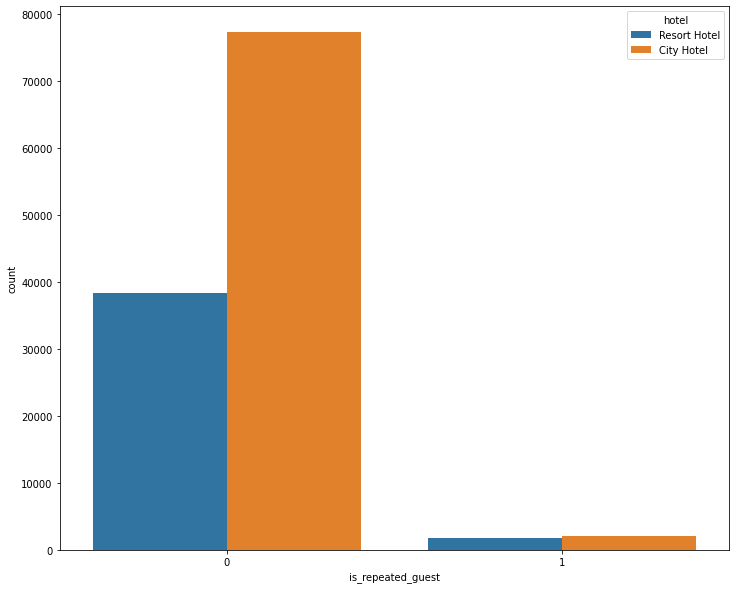

In [37]:
plt.figure(figsize=(12,10))
sns.countplot(data=hotel, x='is_repeated_guest', hue='hotel')
plt.show()

# here we see that most of the guest are firsttimer which can be interpret that the hotel does not generate a repeat order from previous guest or the guest did not fill the information about they previous stay at the hotel.

**MONTH OF RESERVATION**

In [30]:
arrival_month = hotel[hotel['is_canceled'] == 0]['arrival_date_month'].value_counts().reset_index()
arrival_month.columns = ['arrival_date_month', 'No of guest']
arrival_month

# most of reservation is during august, probably during the summer break

,arrival_date_month,No of guest
0,August,8638
1,July,7919
2,May,7114
3,October,6914
4,March,6645
5,April,6565
6,June,6404
7,September,6392
8,February,5372
9,November,4672


**CANCELATION BY REPEATED GUEST**

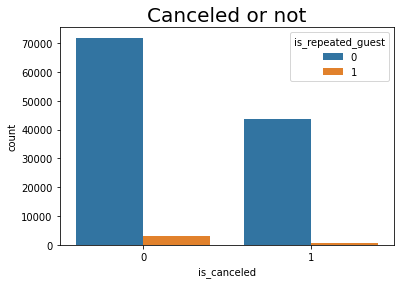

In [34]:
plt.title("Canceled or not", fontdict = {'fontsize': 20})
ax = sns.countplot(x = "is_canceled", hue = 'is_repeated_guest', data = hotel)
plt.show()

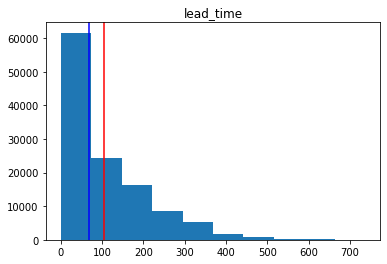

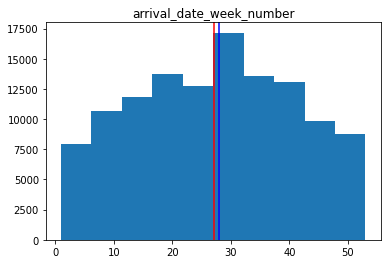

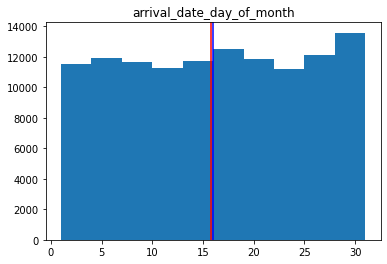

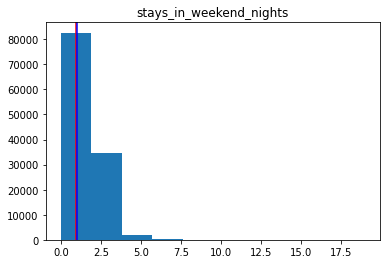

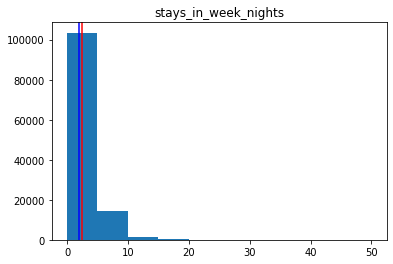

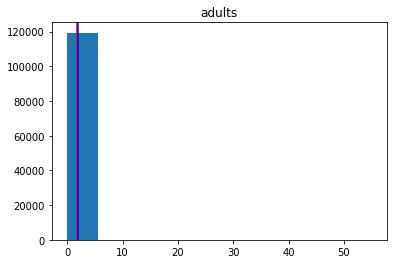

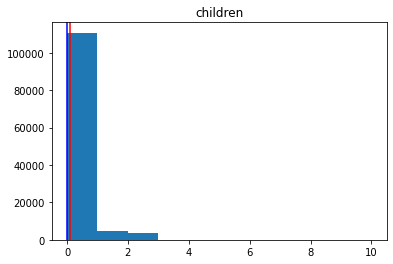

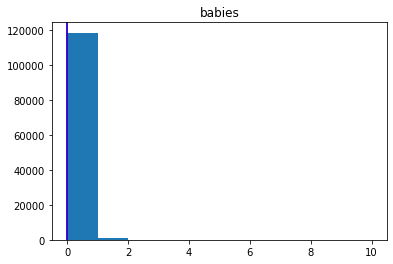

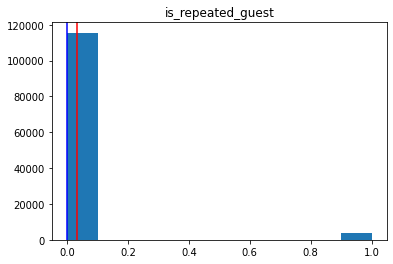

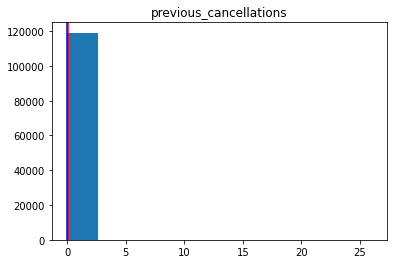

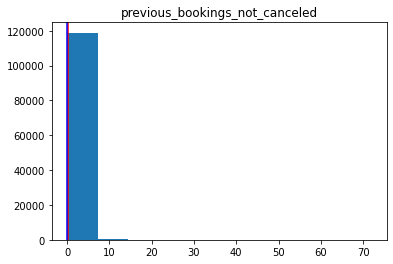

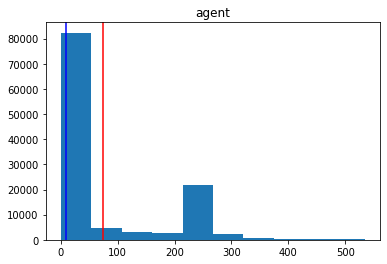

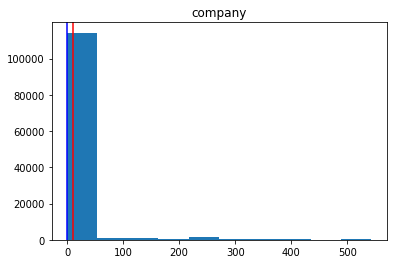

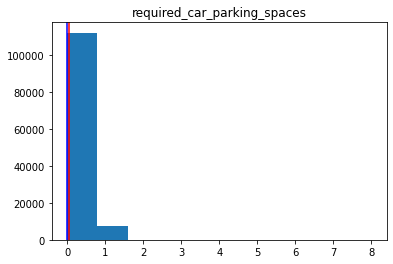

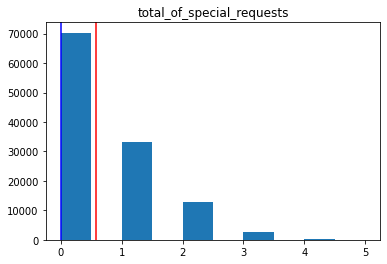

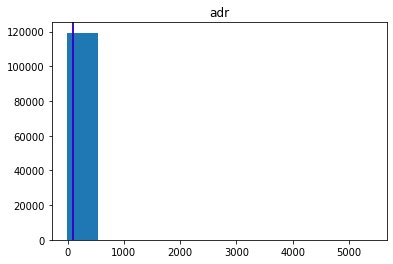

In [43]:
# here are the distribution of data numerical with mean and median in each graph

for i in hotel_num.columns:
    plt.hist(hotel_num[i])
    plt.title(i)
    plt.axvline(x=hotel_num[i].mean(), label='Mean', color='r')
    plt.axvline(x=hotel_num[i].quantile(0.50), label='Median', color='b')  
    plt.show()

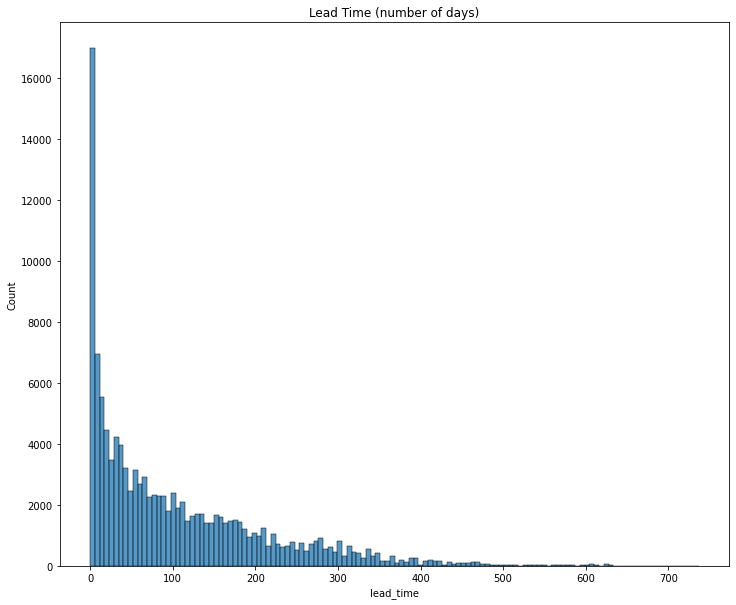

In [52]:
plt.figure(figsize=(12,10))
sns.histplot(data=hotel, x='lead_time')
plt.title('Lead Time (number of days)')
plt.show()

# **DATA PREPROCESSING**

In [95]:
# we choose this feature because we think these are the most important keys to determine the prediction

Features = ['hotel','lead_time','arrival_date_month','stays_in_weekend_nights','stays_in_week_nights','adr']
Target = ['is_canceled']

In [98]:
scaled = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','adr'] # we use minmaxscaler to make the range uniform
onehot_encoded = ['hotel'] # we use ohe because this feature only distinguish between 2 values
ordinal_encoded = ['arrival_date_month'] # we use ordinal because these features have scale of measurement

col_transformer = ColumnTransformer([
    ('scaler', MinMaxScaler(), scaled),
    ('onehot', OneHotEncoder(), onehot_encoded),
    ('ordinal', OrdinalEncoder(), ordinal_encoded)
])

hotel_prep = col_transformer.fit_transform(hotel)

In [118]:
hotel_OHE = hotel['hotel']
hotel_OHE_trans = pd.get_dummies(hotel_OHE)
hotel_OHE_trans

,City Hotel,Resort Hotel
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
...,...,...
119385,1,0
119386,1,0
119387,1,0
119388,1,0


In [119]:
hotel_MMS = hotel[['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','adr']]
mms= MinMaxScaler()
hotel_MMS_trans = pd.DataFrame(mms.fit_transform(hotel_MMS), columns=['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights','adr'])
hotel_MMS_trans

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr
0,0.464043,0.000000,0.00,0.001180
1,1.000000,0.000000,0.00,0.001180
2,0.009498,0.000000,0.02,0.015053
3,0.017639,0.000000,0.02,0.015053
4,0.018996,0.000000,0.04,0.019307
...,...,...,...,...
119385,0.031208,0.105263,0.10,0.018963
119386,0.138399,0.105263,0.10,0.042877
119387,0.046133,0.105263,0.10,0.030351
119388,0.147897,0.105263,0.10,0.020491


In [121]:
hotel_ORD = hotel['arrival_date_month']

In [113]:
ordinal_mapping = [{'col':'arrival_date_month','mapping':{'January':0,'February':1,'March':2,'April':3,
                                                 'May':4,'June':5,'July':6,'August':7,'September':8,'October':9,'November':10,'December': 11}}
                   ]

ordinal_encoder = ce.OrdinalEncoder(cols = 'arrival_date_month',mapping = ordinal_mapping)

In [122]:
hotel_ORD_trans = ordinal_encoder.fit_transform(hotel_ORD)
hotel_ORD_trans

,arrival_date_month
0,6
1,6
2,6
3,6
4,6
...,...
119385,7
119386,7
119387,7
119388,7


In [123]:
hotel_preprocess = pd.concat([hotel_OHE_trans,hotel_MMS_trans,hotel_ORD_trans],axis=1)
hotel_preprocess

,City Hotel,Resort Hotel,lead_time,stays_in_weekend_nights,stays_in_week_nights,adr,arrival_date_month
0,0,1,0.464043,0.000000,0.00,0.001180,6
1,0,1,1.000000,0.000000,0.00,0.001180,6
2,0,1,0.009498,0.000000,0.02,0.015053,6
3,0,1,0.017639,0.000000,0.02,0.015053,6
4,0,1,0.018996,0.000000,0.04,0.019307,6
...,...,...,...,...,...,...,...
119385,1,0,0.031208,0.105263,0.10,0.018963,7
119386,1,0,0.138399,0.105263,0.10,0.042877,7
119387,1,0,0.046133,0.105263,0.10,0.030351,7
119388,1,0,0.147897,0.105263,0.10,0.020491,7


In [125]:
X = hotel_preprocess
y = hotel['is_canceled']

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

**CLUSTERING**

Using K-Means

In [99]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(hotel_prep)
labels = kmeans.predict(hotel_prep)

n_clusters = range(2, 15, 1)

df_results = pd.DataFrame(columns=['k', 'inertia', 'score'])

for k in n_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(hotel_prep)
    df_results = df_results.append({
        'k': k,
        'inertia': kmeans.inertia_,
        'score': kmeans.score(hotel_prep)
    }, ignore_index=True)
    
df_results

,k,inertia,score
0,2.0,437697.827268,-437697.827268
1,3.0,198102.804945,-198102.804945
2,4.0,132834.004531,-132834.004531
3,5.0,102347.381024,-102347.381024
4,6.0,84767.766580,-84767.766580
5,7.0,74271.844719,-74271.844719
6,8.0,68914.039342,-68914.039342
7,9.0,57428.294614,-57428.294614
8,10.0,49694.637752,-49694.637752
9,11.0,41393.081775,-41393.081775


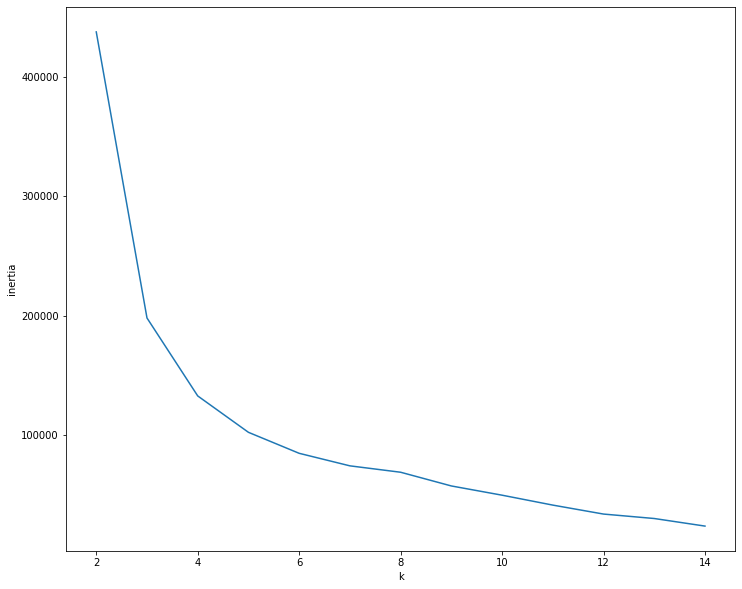

In [100]:
plt.figure(figsize=(12,10))
sns.lineplot(x='k', y='inertia', data=df_results)
plt.show()

the result shows that after n_cluster = 6, the change in the similarity level became insignificant. In that case, six number of cluster is the optimal number of clusters.

# **MODELING DATA**

USING KNN, DECISION TREE AND ADABOOSTCLASSIFIER

In [127]:
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier()
ada = AdaBoostClassifier()

###**Try to predict without cross validation**

Accuracy score = how many that our model predict true or false regardless of the positive and negative <br>
Precission = of all the prediction, how many that we got right(in percentage) <br>
Recall =  of all the reality how many you got right (in percentage) <br>
F1 Score = overall performance of our model

In [133]:
knn = knn.fit(X_train,y_train)
knn_y_pred = knn.predict(X_test)
print("Accuracy KNN:", accuracy_score(y_test, knn_y_pred))
print(classification_report(y_test, knn_y_pred))

Accuracy KNN: 0.7648881815897479
              precision    recall  f1-score   support

           0       0.79      0.85      0.82     14991
           1       0.71      0.62      0.66      8887

    accuracy                           0.76     23878
   macro avg       0.75      0.73      0.74     23878
weighted avg       0.76      0.76      0.76     23878



In [134]:
tree = tree.fit(X_train,y_train)
tree_y_pred = tree.predict(X_test)
print("Accuracy Decision Tree:", accuracy_score(y_test, tree_y_pred))
print(classification_report(y_test, tree_y_pred))

Accuracy Decision Tree: 0.7727615378172377
              precision    recall  f1-score   support

           0       0.82      0.82      0.82     14991
           1       0.69      0.70      0.70      8887

    accuracy                           0.77     23878
   macro avg       0.76      0.76      0.76     23878
weighted avg       0.77      0.77      0.77     23878



In [135]:
ada = ada.fit(X_train,y_train)
ada_y_pred = ada.predict(X_test)
print("Accuracy AdaBoostClassifier:", accuracy_score(y_test, ada_y_pred))
print(classification_report(y_test, ada_y_pred))

Accuracy AdaBoostClassifier: 0.6766060809112991
              precision    recall  f1-score   support

           0       0.69      0.88      0.77     14991
           1       0.62      0.34      0.44      8887

    accuracy                           0.68     23878
   macro avg       0.66      0.61      0.61     23878
weighted avg       0.66      0.68      0.65     23878



# **EVALUATION, MODEL SELECTION AND TUNING**

### **Predict With Cross Validation**

In [136]:
knn_scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
knn_scores 

array([0.76141122, 0.76549414, 0.76473668, 0.75876872, 0.76641189,
       0.75646529, 0.75259135, 0.75950162, 0.76421317, 0.75782641])

In [137]:
knn_scores.mean()

0.7607420489439835

In [138]:
# search for an optimal value of K for KNN

# list of integers 1 to 30
# integers we want to try
k_range = range(1,10)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.7630664819402917, 0.7824461725529893, 0.7624696857932913, 0.7749916344364477, 0.7607420489439835, 0.7699974752045223, 0.7609724187194304, 0.7664795825443484, 0.7582293173279233]


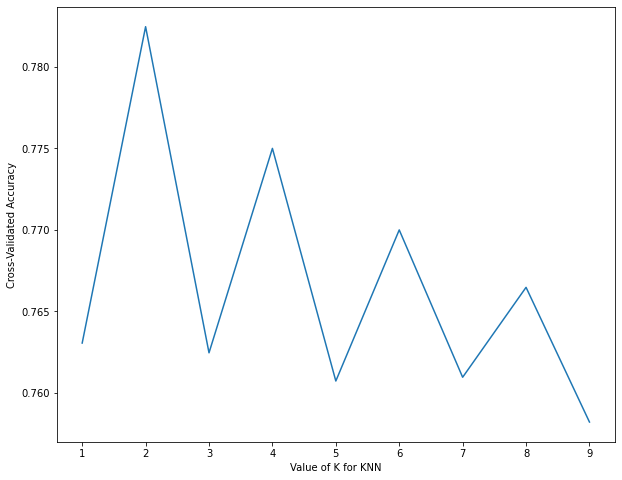

In [141]:
plt.figure(figsize=(10,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
#from cross validation we can see that the best N Neighbor is 2

In [142]:
tree_scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
tree_scores 

array([0.76497069, 0.76538945, 0.77049524, 0.76368967, 0.7669354 ,
       0.76609779, 0.76463198, 0.77018113, 0.77154225, 0.77164695])

In [143]:
tree_scores.mean()

0.7675580529773426

In [147]:
t_range = range(1,10)
t_scores = []

for t in t_range:
    tree = DecisionTreeClassifier(max_depth=t)
    scores = cross_val_score(tree, X_train, y_train, cv=10, scoring='accuracy')
    t_scores.append(scores.mean())
print(t_scores)

[0.6300255465369987, 0.6658430707966945, 0.6658430707966945, 0.6674658925714322, 0.6816526453595587, 0.6951482986863962, 0.7011998818123002, 0.7071153919003457, 0.7180145461716848]


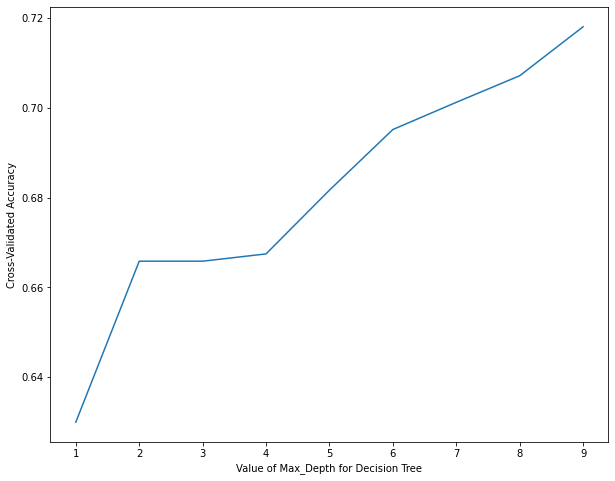

In [148]:
plt.figure(figsize=(10,8))
plt.plot(t_range, t_scores)
plt.xlabel('Value of Max_Depth for Decision Tree')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
#from cross validation we can see that the best Max_depth is 9

In [149]:
ada_scores = cross_val_score(ada, X_train, y_train, cv=10, scoring='accuracy')
ada_scores 

array([0.67682161, 0.66834171, 0.67762538, 0.68715318, 0.67856769,
       0.69071301, 0.67595016, 0.67752068, 0.68149932, 0.67856769])

In [150]:
ada_scores.mean()

0.679276042683315

In [155]:
a_range = range(1,10)
a_scores = []

for a in a_range:
    ada = AdaBoostClassifier(n_estimators=a)
    scores = cross_val_score(ada, X_train, y_train, cv=10, scoring='accuracy')
    a_scores.append(scores.mean())
print(a_scores)

[0.6300255465369987, 0.6658430707966945, 0.6658430707966945, 0.6658430707966945, 0.6658430707966945, 0.6658430707966945, 0.6639480832161365, 0.6653510371106571, 0.6653615061223824]


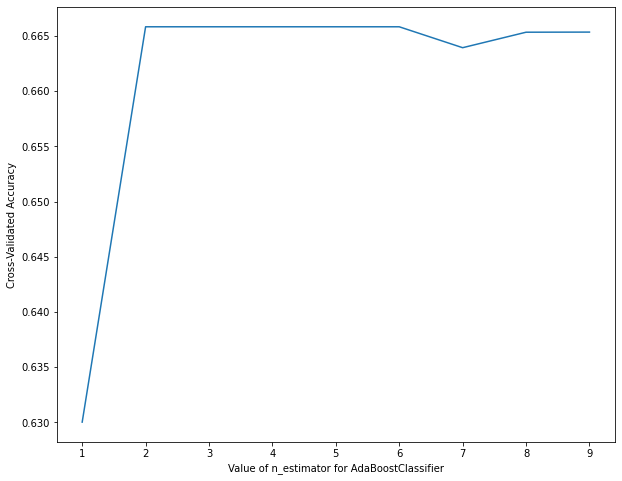

In [157]:
plt.figure(figsize=(10,8))
plt.plot(a_range, a_scores)
plt.xlabel('Value of n_estimator for AdaBoostClassifier')
plt.ylabel('Cross-Validated Accuracy')
plt.show()
#from cross validation we can see that the best n_estimator is 2

after trying several models, we can conclude that decision tree works better than other model using accuracy as parameter. as the other model accuracy is not far from decision tree, we can consider that patterns within this problems dataset can be easiy learned by our learning algorithm

### **Hyperparameter Tuning with RandomizedSearchCV**

In [158]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [160]:
param = {'max_depth':[1,9],'max_features':randint(1,9),'min_samples_leaf':randint(1,9),'criterion':['entropy','gini']}

In [165]:
tree_cv = RandomizedSearchCV(tree,param,cv = 10)

In [166]:
tree_cv.fit(X,y)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=9,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
            

In [167]:
tree_cv.best_params_

{'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'min_samples_leaf': 6}

In [168]:
tree_cv.best_score_

0.6297428595359746

# **RESULT, CONCLUSSION AND RECOMMENDATION**

as a result, our model could give 62% of accuracy for predicting guest that will canceling their reservation. This matter can due to the amount of features that we include are statistically irrelevant. For further analysis we recommend to use all the information given (all features) first then to eliminate one by one the less relevant feature, but in contradiction it would requiere amount set of time because the dataset given is quite a lot.